In [72]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [73]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic_df = pd.DataFrame(titanic_data)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
#2
stats = pd.DataFrame.describe(titanic_df)
stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
head = pd.DataFrame.head(titanic_df)
head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
info = pd.DataFrame.info(titanic_df)
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


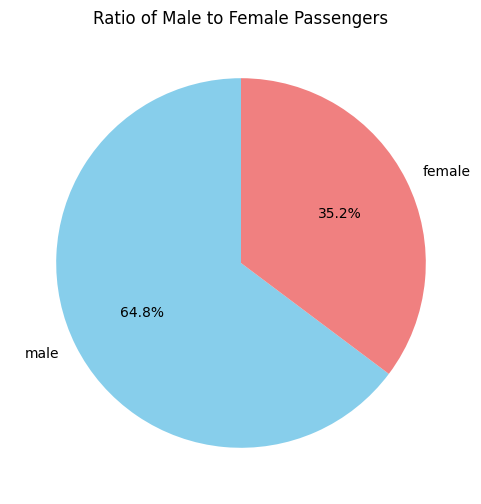

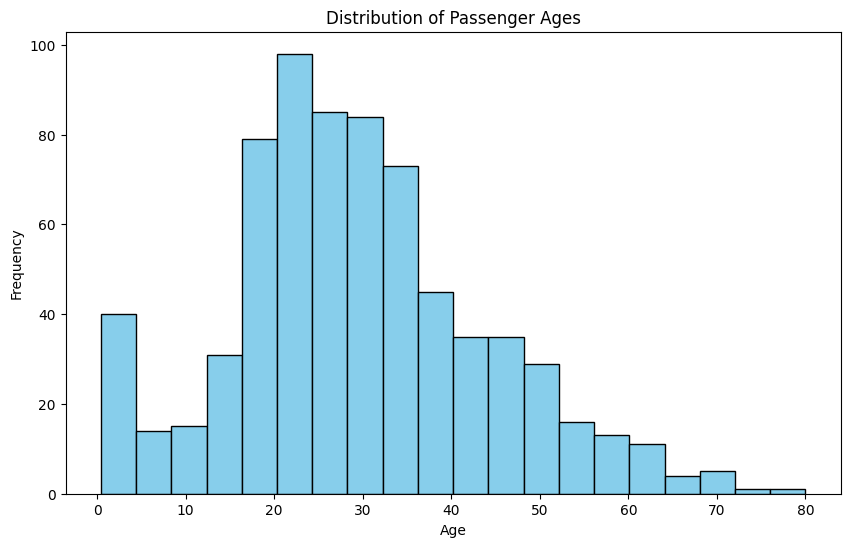

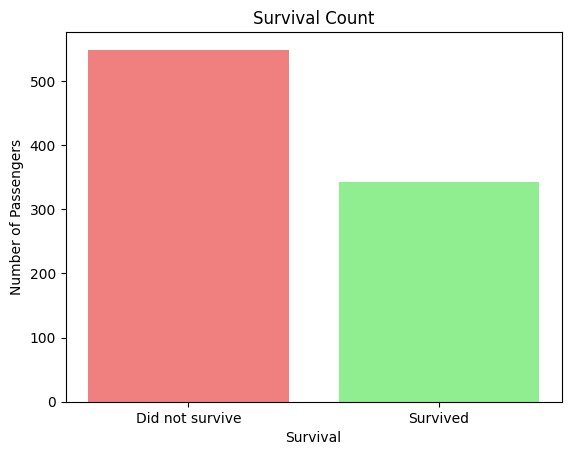

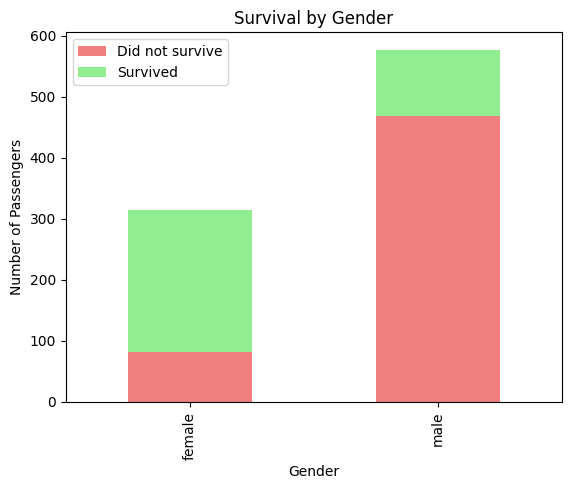

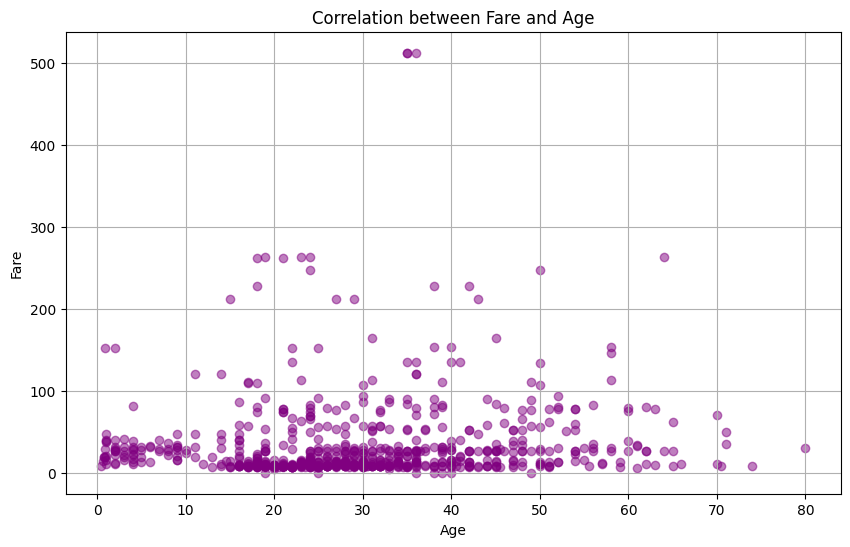

In [77]:
# Create a pie chart to show the ratio of male to female passengers
gender_counts = titanic_df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Ratio of Male to Female Passengers')
plt.show()

# Create a histogram to show the distribution of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()

# Create a bar plot to show the number of passengers who survived and didn’t survive
survival_counts = titanic_df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values, color=['lightcoral', 'lightgreen'])
plt.xticks(survival_counts.index, ['Did not survive', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.title('Survival Count')
plt.show()

# Create a stacked bar plot to show survival by gender
survival_by_gender = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_gender.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Survival by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Create a scatter plot to show the correlation between fare and age
plt.figure(figsize=(10, 6))
plt.scatter(titanic_df['Age'], titanic_df['Fare'], color='purple', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation between Fare and Age')
plt.grid(True)
plt.show()

In [78]:
# Handle missing values in the 'Age' column by replacing with median age
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

# Normalize the 'Fare' column using StandardScaler
scaler = StandardScaler()
titanic_df['Fare_normalized'] = scaler.fit_transform(titanic_df[['Fare']])

# Convert the 'Sex' column using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
sex_encoded = encoder.fit_transform(titanic_df[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=['Sex_encoded'])
titanic_df = pd.concat([titanic_df, sex_encoded_df], axis=1)

# Drop the original 'Sex' and 'Fare' columns
titanic_df.drop(['Sex', 'Fare'], axis=1, inplace=True)

# Display the preprocessed DataFrame
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket Cabin Embarked  Fare_normalized  Sex_encoded  
0         A/5 21171   NaN        S        -0.502445          1.0  
1          PC 17599   C85        C         0.786845          0.0  
2  STON/O2. 3101282   NaN        S        -0.488854          0.0  
3            113803  C123        S         0.420730       

C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [92]:
# Calculate the survival rate for different genders
gender_survival_rate = titanic_df.groupby('Sex_encoded')['Survived'].mean()
print('Survival Rate by Gender:')
gender_survival_rate

Survival Rate by Gender:


Sex_encoded
0.0    0.742038
1.0    0.188908
Name: Survived, dtype: float64

In [87]:
# Calculate the survival rate for different passenger classes
class_survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()
print('\nSurvival Rate by Passenger Class:')
class_survival_rate


Survival Rate by Passenger Class:


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [88]:
# Identify the passenger with the highest fare
passenger_with_highest_fare = titanic_df.loc[titanic_df['Fare_normalized'].idxmax()]
print('\nPassenger with the Highest Fare:')
passenger_with_highest_fare


Passenger with the Highest Fare:


PassengerId                     259
Survived                          1
Pclass                            1
Name               Ward, Miss. Anna
Age                            35.0
SibSp                             0
Parch                             0
Ticket                     PC 17755
Cabin                           NaN
Embarked                          C
Fare_normalized            9.667167
Sex_encoded                     0.0
Name: 258, dtype: object